# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/astronaut.png` and show it:

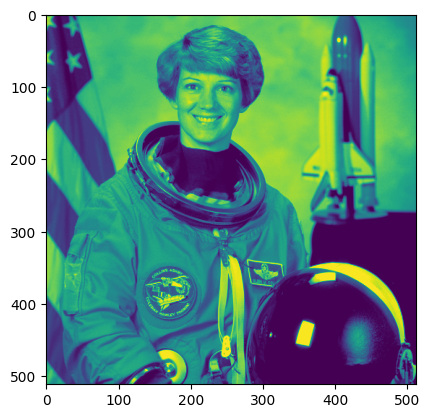

In [3]:
img = plt.imread('data/astronaut.png')
plt.imshow(img)

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical 3&times;3 Prewitt filters:

In [39]:
def prewitt_h(img):
    result = numpy.zeros(img.shape)
    n = 1
    for p in numpy.ndindex(img.shape):
        if p[0] - n < 0 or p[0] + n >= img.shape[0] or p[1] - n < 0 or p[1] + n >= img.shape[1]:
            continue
        neighborhood_sum = 0
        for q in numpy.ndindex(3, 3):
            y = p[0] - n + q[0]
            x = p[1] - n + q[1]
            if x < p[1]:
                neighborhood_sum -= img[y,x]
            elif x > p[1]:
                neighborhood_sum += img[y,x]
            else:
                continue
        horizontal = neighborhood_sum / 6
        result[p] = horizontal
    return result
    
def prewitt_v(img):
    result = numpy.zeros(img.shape)
    n = 1
    for p in numpy.ndindex(img.shape):
        if p[0] - n < 0 or p[0] + n >= img.shape[0] or p[1] - n < 0 or p[1] + n >= img.shape[1]:
            continue
        neighborhood_sum = 0
        for q in numpy.ndindex(3, 3):
            y = p[0] - n + q[0]
            x = p[1] - n + q[1]
            if y < p[0]:
                neighborhood_sum -= img[y,x]
            elif y > p[0]:
                neighborhood_sum += img[y,x]
            else:
                continue
        vertikal = neighborhood_sum / 6
        result[p] = vertikal
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

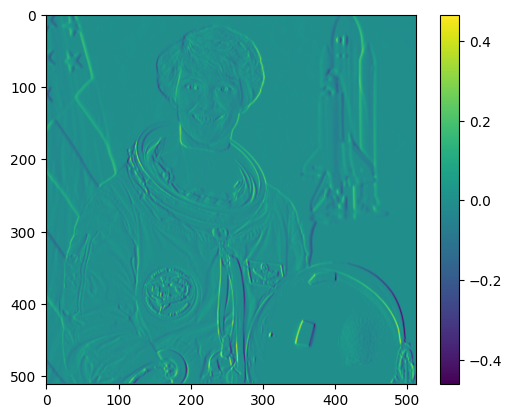

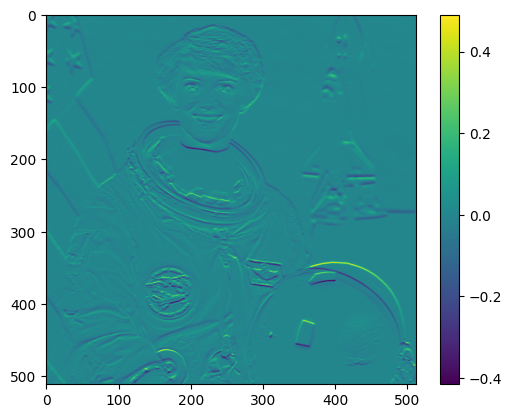

In [40]:
plt.figure()
plt.imshow(prewitt_h(img))
plt.colorbar()

plt.figure()
plt.imshow(prewitt_v(img))
plt.colorbar()


**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/astronaut_prewitt_h.tiff` and `data/astronaut_prewitt_v.tiff`:

In [41]:
import skimage.io
img1 = prewitt_h(img)
img2 = skimage.io.imread('data/astronaut_prewitt_h.tiff')
assert numpy.allclose(img1, img2, atol=1/255)

In [42]:
import skimage.io
img3 = prewitt_v(img)
img4 = skimage.io.imread('data/astronaut_prewitt_v.tiff')
assert numpy.allclose(img3, img4, atol=1/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

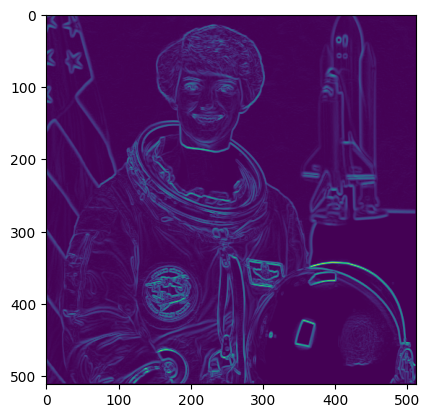

In [33]:
plt.imshow(numpy.sqrt(img1**2 + img3**2))

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/astronaut_prewitt_gradmag.tiff`:

In [43]:
imgg = (numpy.sqrt(img1**2 + img3**2))
imggradmag = skimage.io.imread('data/astronaut_prewitt_gradmag.tiff')
assert numpy.allclose(imgg, imggradmag, atol=1/255)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical 3&times;3 Sobel filtering, respectively:

In [64]:
def sobel_h(img):
    result = numpy.zeros(img.shape)
    n = 1
    for p in numpy.ndindex(img.shape):
        if p[0] - n < 0 or p[0] + n >= img.shape[0] or p[1] - n < 0 or p[1] + n >= img.shape[1]:
            continue
        neighborhood_sum = 0
        for q in numpy.ndindex(3, 3):
            y = p[0] - n + q[0]
            x = p[1] - n + q[1]
            if x < p[1] and y == p[0]:
                neighborhood_sum -= (2* img[y,x])
            elif x < p[1]:
                neighborhood_sum -= img[y,x]
            elif x > p[1] and y == p[0]:
                neighborhood_sum += (2* img[y,x])    
            elif x > p[1]:
                neighborhood_sum += img[y,x]
            else:
                continue
        horizontal = neighborhood_sum / 8
        result[p] = horizontal
    return result
    
def sobel_v(img):
    result = numpy.zeros(img.shape)
    n = 1
    for p in numpy.ndindex(img.shape):
        if p[0] - n < 0 or p[0] + n >= img.shape[0] or p[1] - n < 0 or p[1] + n >= img.shape[1]:
            continue
        neighborhood_sum = 0
        for q in numpy.ndindex(3, 3):
            y = p[0] - n + q[0]
            x = p[1] - n + q[1]
            if y < p[0] and x == p[1]:
                neighborhood_sum += (2*img[y,x])
            elif y < p[0]:
                neighborhood_sum += img[y,x]
            elif y > p[0] and x == p[1]:
                neighborhood_sum -= (2*img[y,x])
            elif y > p[0]:
                neighborhood_sum -= img[y,x]
            else:
                continue
        vertikal = neighborhood_sum / 8
        result[p] = vertikal
    return result

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

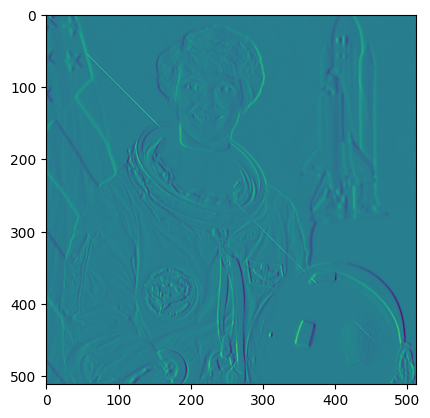

In [49]:
plt.imshow(sobel_h(img))

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/astronaut_sobel_h.tiff` and `data/astronaut_sobel_v.tiff`:

In [66]:
import skimage.io
img7 = sobel_h(img)
img8 = skimage.io.imread('data/astronaut_sobel_h.tiff')
img9 = sobel_v(img)
img10 = skimage.io.imread('data/astronaut_sobel_v.tiff')
assert numpy.allclose(img7, img8, atol=1/255)